[13- Implementing a neural network for music genre classification](https://www.youtube.com/watch?v=_xcFAiufwd0&list=PL-wATfeyAMNrtbkCNsLcpoAyBBRJZVlnf&index=14)

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

In [2]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [3]:
# open json
# path to json file that stores MFCCs and genre labels for each processed segment
# change path for DATA_PATH to wherever you can get the data_extract_music.json from extract_data.ipynb
# for me: make sure mouunted to school drive
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/data_extract_music.json"

In [4]:
if __name__ == "__main__":

    # load data
    X, y = load_data(DATA_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # build network topology
    model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        # 1st dense layer - 512 neurons
        keras.layers.Dense(512, activation='relu'),

        # 2nd dense layer - 256 neurons
        keras.layers.Dense(256, activation='relu'),

        # 3rd dense layer - 64 neurons
        keras.layers.Dense(64, activation='relu'),

        # output layer - 10 neurons (the 10 genres)
        keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)


Data succesfully loaded!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
104/104 [=

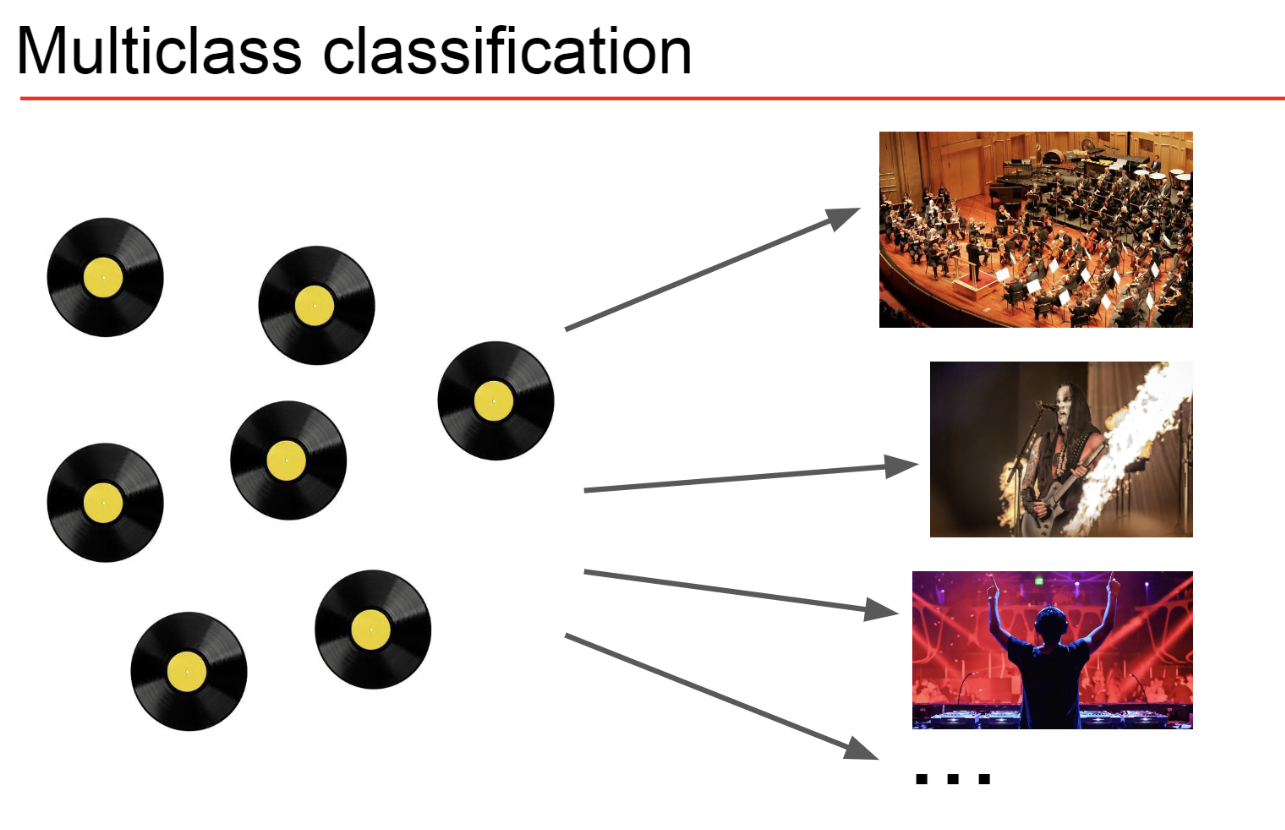

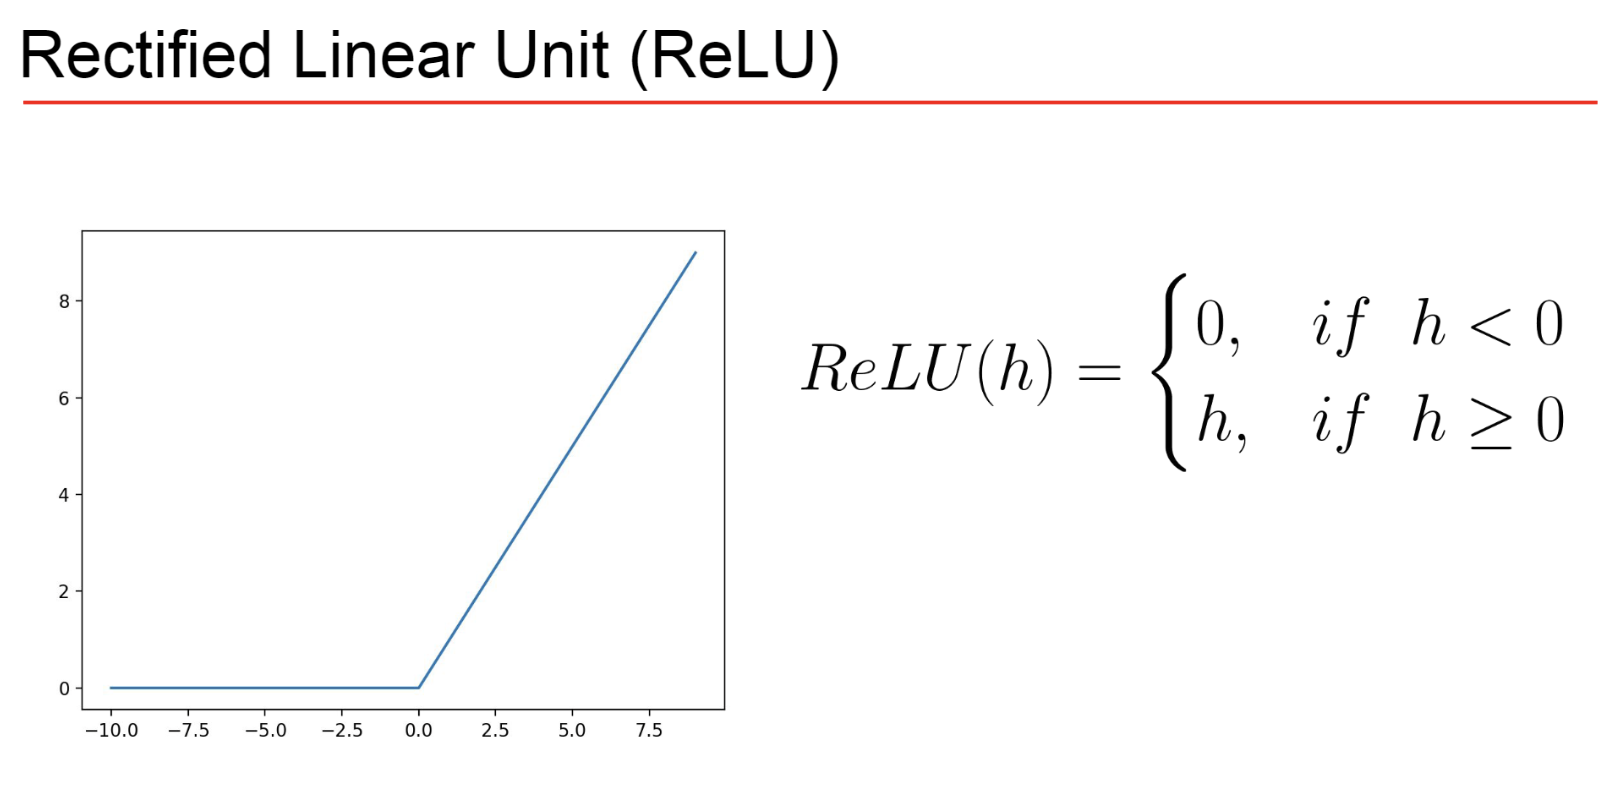

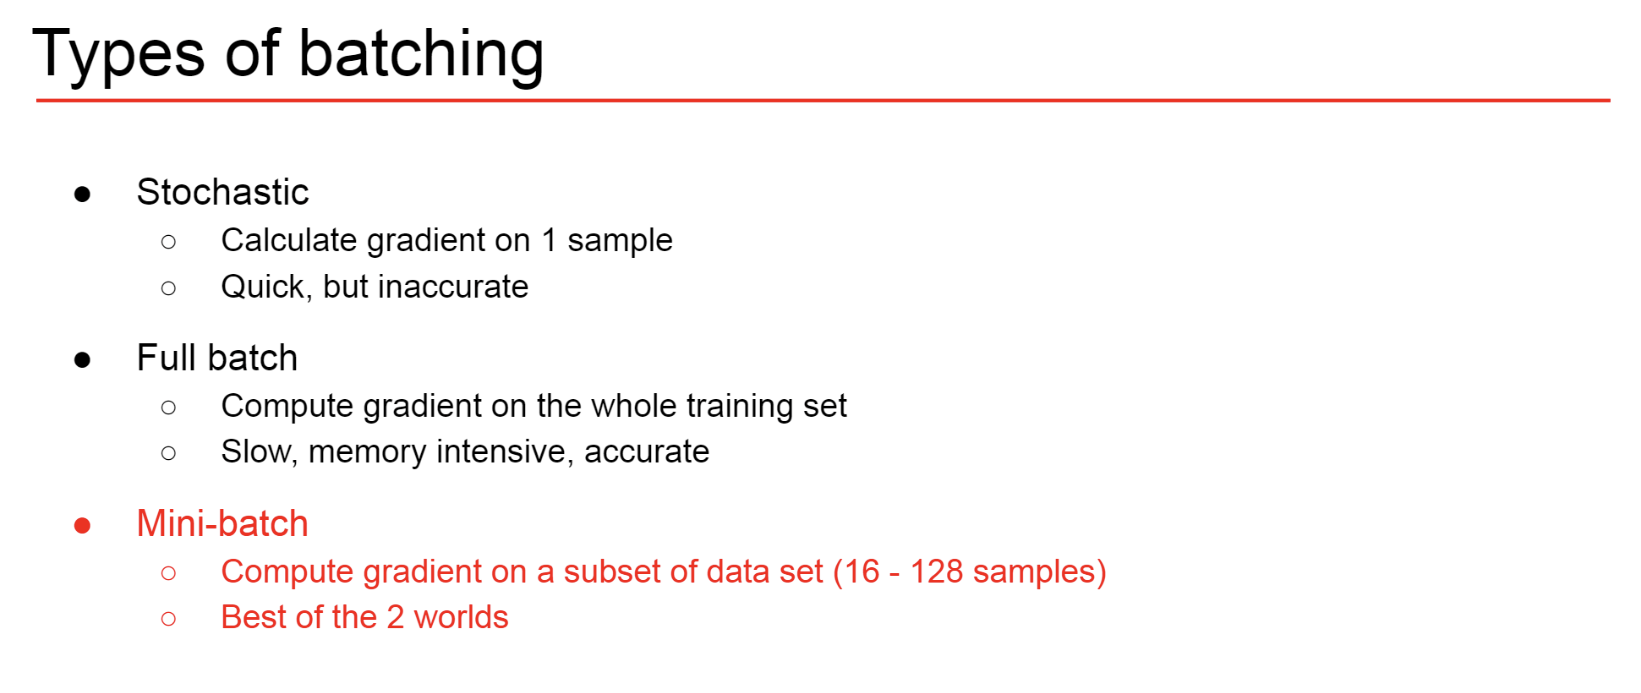